<a href="https://colab.research.google.com/github/palarunava/machine-learning-courses/blob/main/tensorflow-developer-professional-certificate/fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

Number of training samples: (60000, 28, 28)
Number of test samples: 10000
LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 1

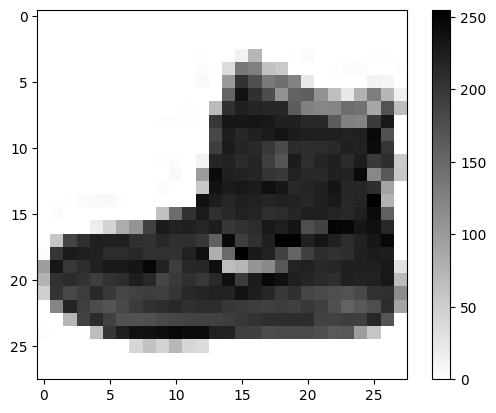

In [68]:
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(f'Number of training samples: {training_images.shape}')
print(f'Number of test samples: {test_images.shape[0]}')

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
# Arg
#   cmp: colormap = 'viridis' by default
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()

# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**Softmax function**

In [56]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


**Model with 128 parameters**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6281 - sparse_categorical_accuracy: 0.7838
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3902 - sparse_categorical_accuracy: 0.8605
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3384 - sparse_categorical_accuracy: 0.8770
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3124 - sparse_categorical_accuracy: 0.8841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2916 - sparse_categorical_accuracy: 0.8927
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3812 - sparse_categorical_accuracy: 0.8632
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


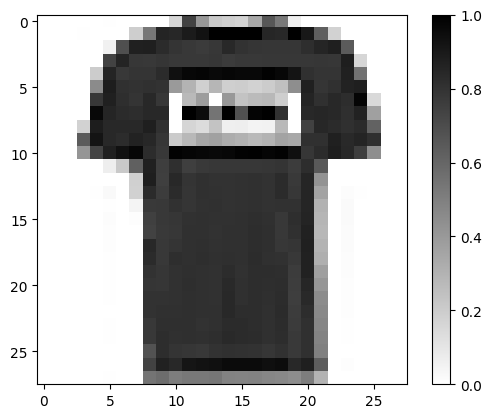


The probability for each class: [1.3003225e-04 8.0723137e-11 9.6738088e-01 6.5592923e-07 1.8153853e-03 4.6457897e-11 3.0672796e-02 6.7790544e-11 7.2569954e-08 4.8514274e-12]

The predicted class is 2 and the actual class is 2


In [65]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(training_images, training_labels, epochs=5)

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

index = 1
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[index]}')
print(f'\nThe predicted class is {np.argmax(classifications[index])} and the actual class is {test_labels[index]}')

**Model with 512 parameters**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.7882
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.3788 - sparse_categorical_accuracy: 0.8622
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.2986 - sparse_categorical_accuracy: 0.8889
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.2782 - sparse_categorical_accuracy: 0.8964
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3254 - sparse_categorical_accuracy: 0.8788
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


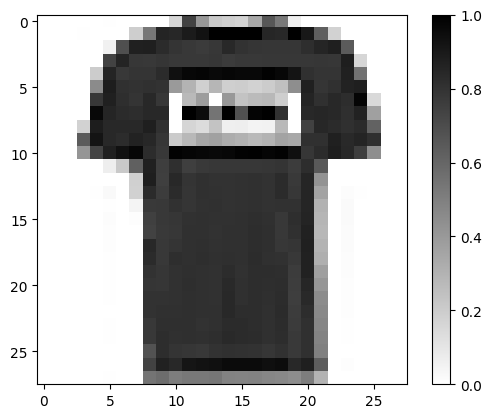


The probability for each class: [7.0639019e-04 2.1586458e-10 9.9394983e-01 8.2218619e-08 2.2303637e-03 4.0328965e-10 3.1132612e-03 1.1835070e-12 5.3893960e-08 9.5107720e-11]

The predicted class is 2 and the actual class is 2


In [60]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(training_images, training_labels, epochs=5)

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

index = 1
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[index]}')
print(f'\nThe predicted class is {np.argmax(classifications[index])} and the actual class is {test_labels[index]}')

**Model with 1024 parameters**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 0.5855 - sparse_categorical_accuracy: 0.7934
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.8665
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.8787
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.2993 - sparse_categorical_accuracy: 0.8884
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.2789 - sparse_categorical_accuracy: 0.8972
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3231 - sparse_categorical_accuracy: 0.8830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


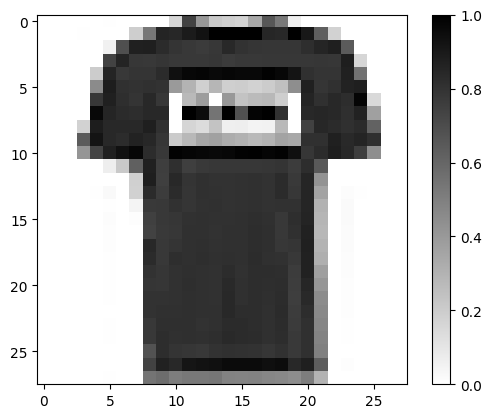


The probability for each class: [1.0960249e-05 5.3505529e-09 9.9283922e-01 7.2806977e-10 6.3203624e-03 2.0714013e-09 8.2934764e-04 3.1913715e-14 8.7543270e-08 8.2430485e-10]

The predicted class is 2 and the actual class is 2


In [61]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(training_images, training_labels, epochs=5)

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

index = 1
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[index]}')
print(f'\nThe predicted class is {np.argmax(classifications[index])} and the actual class is {test_labels[index]}')

**Model with 2 layers (512 + 128) parameters**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 5.7202 - sparse_categorical_accuracy: 0.6413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.6247 - sparse_categorical_accuracy: 0.7533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.5082 - sparse_categorical_accuracy: 0.8183
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4637 - sparse_categorical_accuracy: 0.8356
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4306 - sparse_categorical_accuracy: 0.8480
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4399 - sparse_categorical_accuracy: 0.8435
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


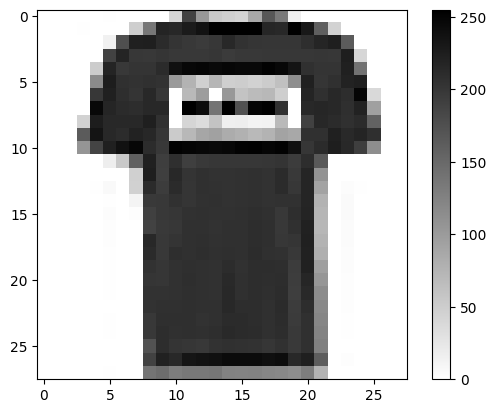


The probability for each class: [2.9746745e-06 3.2966260e-12 9.8808968e-01 3.6985552e-06 1.1628326e-02 1.8261117e-36 2.7523865e-04 0.0000000e+00 6.4650167e-15 2.9322758e-23]

The predicted class is 2 and the actual class is 2


In [67]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(training_images, training_labels, epochs=5)

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

index = 1
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[index]}')
print(f'\nThe predicted class is {np.argmax(classifications[index])} and the actual class is {test_labels[index]}')

**Model with 128 parameters with *Callbacks***

Epoch 1/5
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7831 - loss: 0.6262
{'accuracy': 0.8235166668891907, 'loss': 0.5007659792900085}

Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7833 - loss: 0.6258
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.4121
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


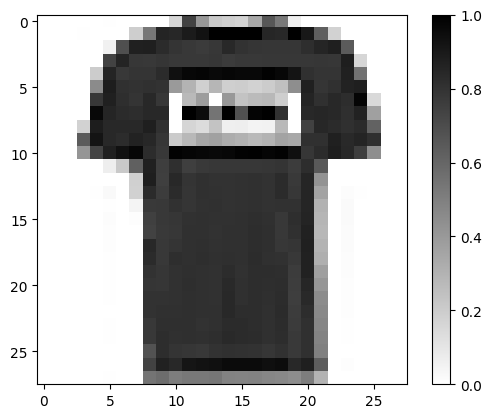


The probability for each class: [6.7307796e-05 4.3684216e-07 9.6403956e-01 5.8135553e-05 9.7754188e-03 4.7392344e-08 2.5977734e-02 9.1980191e-12 8.1277940e-05 6.3535302e-11]

The predicted class is 2 and the actual class is 2


In [72]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check the loss
        # if logs['loss'] < 0.4:

        # Check accuracy
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),
#   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#   metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
# )

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

index = 1
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[index]}')
print(f'\nThe predicted class is {np.argmax(classifications[index])} and the actual class is {test_labels[index]}')